In [ ]:
# Installing XGBoost for advanced tree-based classification
!pip install xgboost

In [ ]:
# Importing all necessary libraries for data manipulation, visualization, and ML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# The dataset we will use here to perform the analysis and build a predictive model is Bitcoin Price data. 
# We will use OHLC('Open', 'High', 'Low', 'Close') data from 17th July 2014 to 29th December 2022 which is for 8 years for the Bitcoin price

In [ ]:
# Loading the Bitcoin price data and previewing the first few rows
df = pd.read_csv('C:/Users/DELL/Desktop/Datasets/bitcoin.csv')
df.head()

In [54]:
# Checking dataset dimensions: (rows, columns)
df.shape

(2713, 7)

In [ ]:
# Getting summary statistics to understand price ranges and distributions
# Useful for spotting anomalies and understanding the range of values
df.describe()

In [ ]:
# Displaying data types and null counts for each column to understand structure
df.info()

In [ ]:
# Exploratory Data Analysis(EDA):
# Exploratory Data Analysis(EDA) is an approach to analyzing the data using visual techniques. 
# It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. 
# While performing the EDA of the Bitcoin Price data, 
# we will analyze how prices of the cryptocurrency have moved over the period of time 
# and how the end of the quarters affects the prices of the currency.

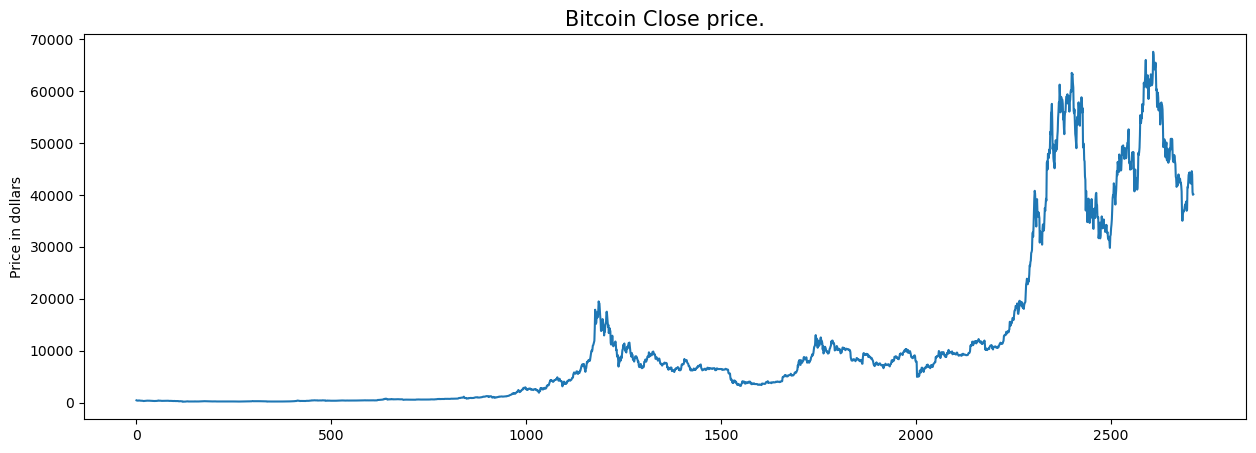

In [58]:
# Plotting the 'Bitcoin Close Price' over time to get a sense of Bitcoin's historical trend
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars')
plt.show()

#The prices of the Bitcoin stocks are showing an upward trend as depicted by the plot of the closing price of the stocks.

In [59]:
# Checking if 'Close' and 'Adj Close' columns are identical
df[df['Close'] == df['Adj Close']].shape, df.shape

((2713, 7), (2713, 7))

In [60]:
# Dropping 'Adj Close' column as it is redundant
df = df.drop(['Adj Close'], axis=1)

In [61]:
# Previewing the first few rows of the updated dataset
df.head()

,Date,Open,High,Low,Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100


In [62]:
# Checking for any missing (null) values in the dataset
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

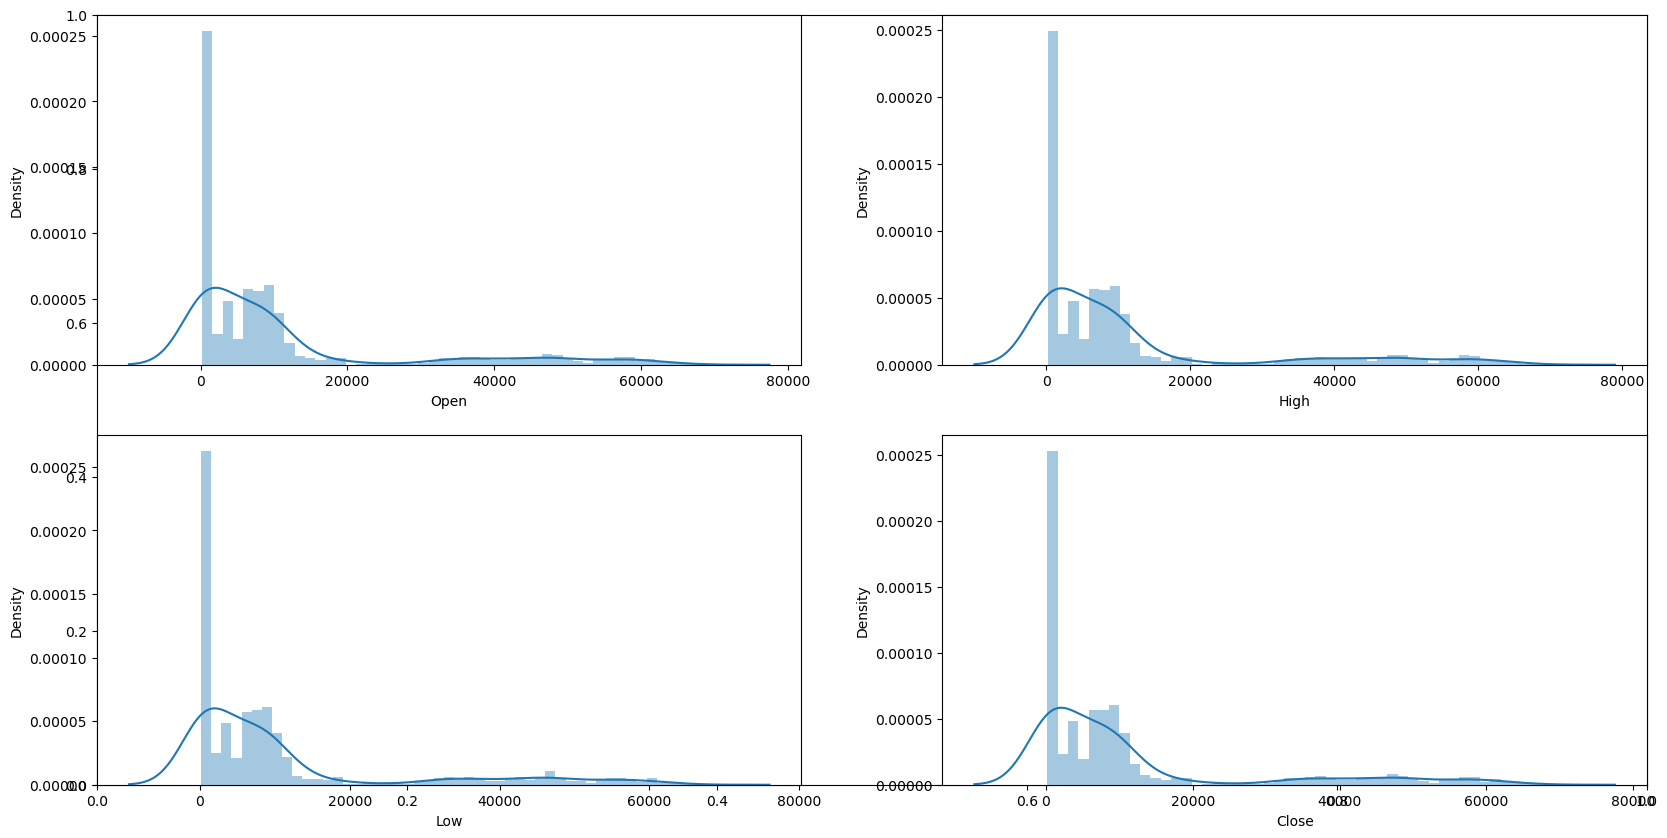

In [63]:
# Plotting distributions of price-related columns to understand their shape
# These plots give you insight into price behavior and variability.
features = ['Open', 'High', 'Low', 'Close']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df[col])
plt.show()

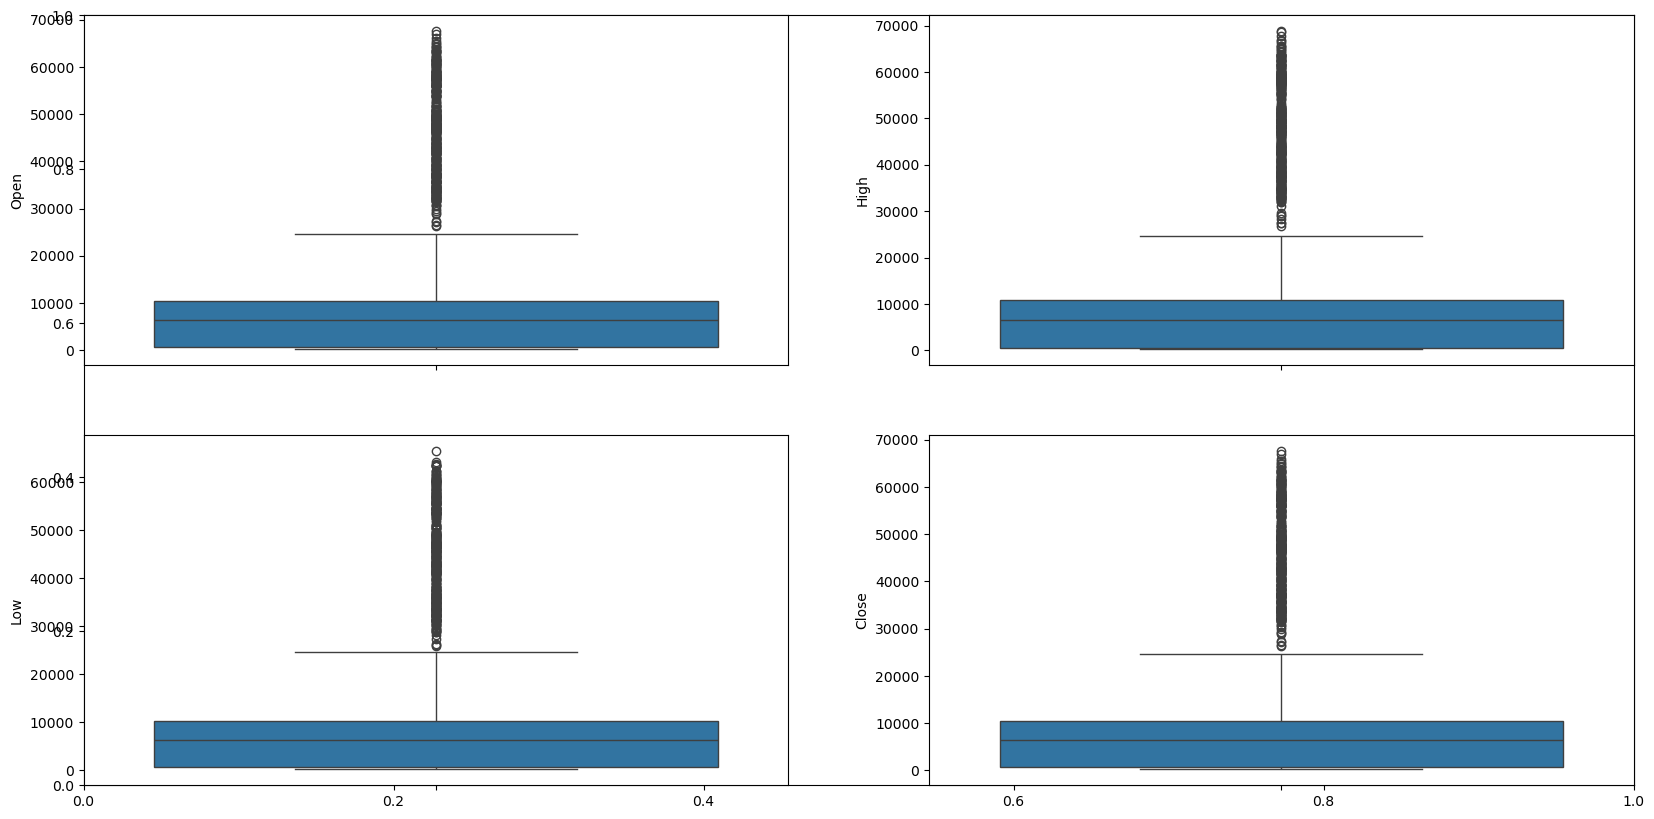

In [64]:
# Creating box plots for key price columns to identify outliers and spread
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.boxplot(df[col])
plt.show()

In [66]:
# There are so many outliers in the data which means that the prices of the stock have varied hugely in a very short period of time. 
# We further check this with the help of a barplot. 

In [ ]:
# Feature Engineering:
# Feature Engineering helps to derive some valuable features from the existing ones. 
# These extra features sometimes help in increasing the performance of the model significantly 
# and certainly help to gain deeper insights into the data.

In [68]:
# Splitting the date into year, month, and day for feature engineering
splitted = df['Date'].str.split('-', expand=True)
df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

# Converting 'Date' column into datetime format
df['Date'] = pd.to_datetime(df['Date']) 

# Previewing the updated dataset
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


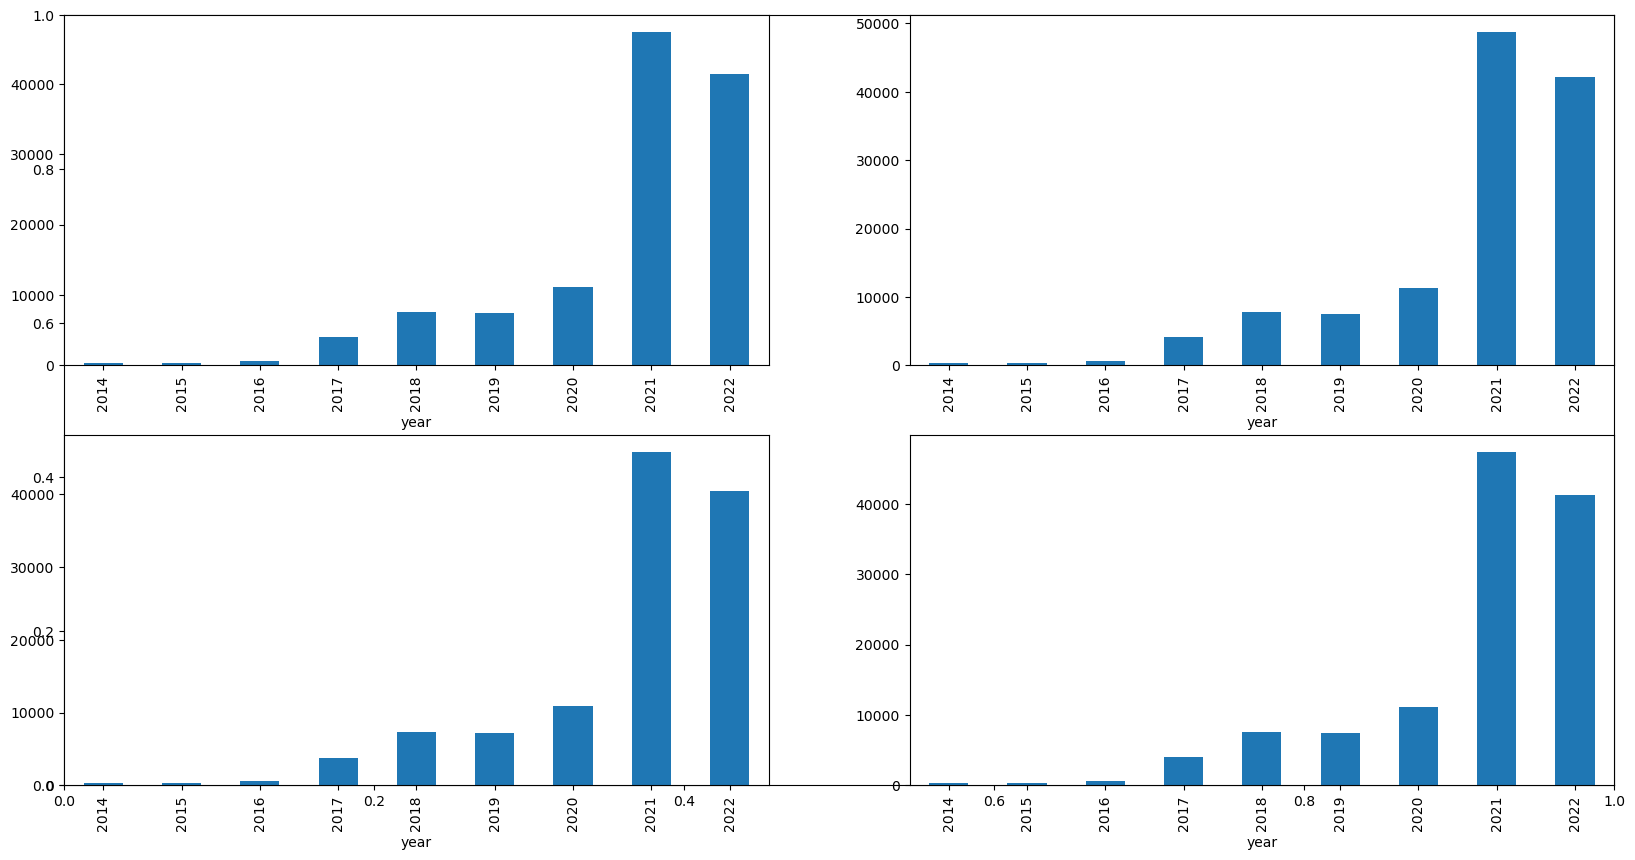

In [69]:
# Grouping data by year to calculate average prices, then plotting them
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [ ]:
# We can observe why there are so many outliers in the data as the prices of bitcoin have exploded in the year 2021.

In [71]:
# Creating a new binary feature to indicate whether a month is at the end of a quarter
# This is based on the idea that markets may behave differently at the end of financial quarters.
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


In [72]:
# Creating new features to capture price movement and range
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']

# Creating a target column: 1 if next day's price is higher, 0 otherwise
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

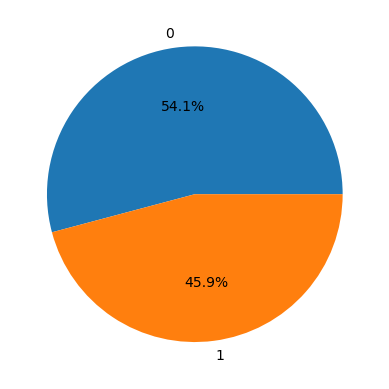

In [73]:
# Plotting a pie chart to see the distribution of the target variable
# Draws a pie chart showing how many days the price went up (1) vs not up (0).
# If the classes are roughly 50-50, it’s ideal. If not, special handling may be needed.
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

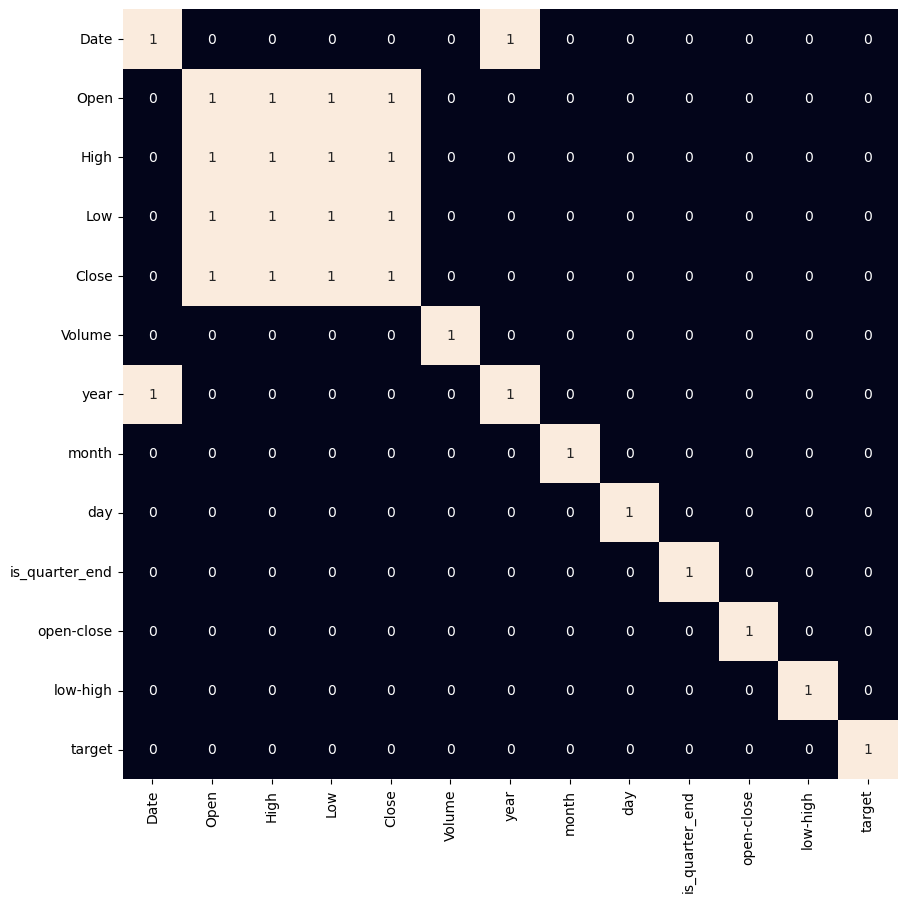

In [74]:
# Checking for high correlation between features to avoid redundancy in the model
# This helps in spotting redundant features & avoid multicollinearity in models
plt.figure(figsize=(10, 10))

# As our concern is with the highly correlated features only so, we will visualize our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [ ]:
# From the above heatmap, we can say that there is a high correlation between OHLC which is pretty obvious, 
# and the added features are not highly correlated with each other or previously provided features which means that we are good to proceed and build our model.

In [76]:
# Selecting features and target for training
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

# Standardizing the feature values
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Performing a manual time-based train-test split (70% train, 30% test)
# This manual split keeps the time order — important for time series problems like stock prices
X_train, X_valid, Y_train, Y_valid = features[:len(features)//7],features[len(features)//7:],target[:len(features)//7],target[len(features)//7:]

In [ ]:
# Model Development and Evaluation:

# We train 3 machine learning models(Logistic Regression, Support Vector Machine, XGBClassifier), 
# and then based on their performance on the training and validation data we will choose which ML model is serving the purpose at hand better.

# 3 machine learning models were used:
# LogisticRegression: Simple and interpretable model for binary classification.
# SVC(kernel='poly'): Support Vector Machine with a polynomial kernel (can model more complex decision boundaries).
# XGBClassifier: A powerful, tree-based model that often performs best for structured data.

# For the evaluation metric, we will use the ROC-AUC curve, 
# this is because instead of predicting the hard probability that is 0 or 1,
# we would like it to predict soft probabilities that are continuous values between 0 to 1. 
# And with soft probabilities, the ROC-AUC curve is generally used to measure the accuracy of the predictions.

# We evaluate each model using ROC AUC score:
# Measures how well the model separates the two classes (0 and 1).
# 1.0 = perfect, 0.5 = random guessing.

In [78]:
# Training three different models and evaluating them using ROC-AUC score
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5351397573619796
Validation Accuracy :  0.5170956321701721

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4620811287477955
Validation Accuracy :  0.4876112870458891

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Traini

In [ ]:
# Among the three models that we have trained,
# XGBClassifier has the highest performance but it is prone to overfitting as the difference between the training and the validation accuracy is too high. 
# But in the case of the Logistic Regression, this is not the case.

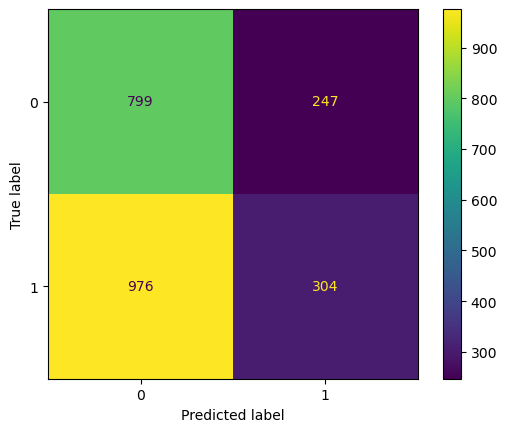

In [80]:
# Plotting confusion matrix for Logistic Regression to evaluate prediction results
from sklearn.metrics import ConfusionMatrixDisplay

# Useful for understanding how the model makes mistakes.
ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()

In [ ]:
# Conclusion: 
# We can observe that the accuracy achieved by ML model is no better than simply guessing with a probability of 50%. 
# Possible reasons for this may be the lack of data or using a very simple model to perform such a complex task as Stock Market prediction.